In [7]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from scipy.optimize import curve_fit

"""
lattice = np.loadtxt("../output2/final_config.txt")
lattice2 = np.loadtxt("../output2/final_config2.txt")
lattice[lattice>=1] = 1
lattice2[lattice2>=1] = 1
#lattice2[lattice2==-1] = -1
fig, axs = plt.subplots(nrows=2,ncols=1,figsize=(10,10))
data = [lattice,lattice2]
for ax,l in zip(axs,data):
    img=ax.imshow(l, interpolation='none')
    fig.colorbar(img,ax=ax)
"""

'\nlattice = np.loadtxt("../output2/final_config.txt")\nlattice2 = np.loadtxt("../output2/final_config2.txt")\nlattice[lattice>=1] = 1\nlattice2[lattice2>=1] = 1\n#lattice2[lattice2==-1] = -1\nfig, axs = plt.subplots(nrows=2,ncols=1,figsize=(10,10))\ndata = [lattice,lattice2]\nfor ax,l in zip(axs,data):\n    img=ax.imshow(l, interpolation=\'none\')\n    fig.colorbar(img,ax=ax)\n'

In [8]:
data = np.loadtxt("../output2/n_islands_vs_gamma.txt")

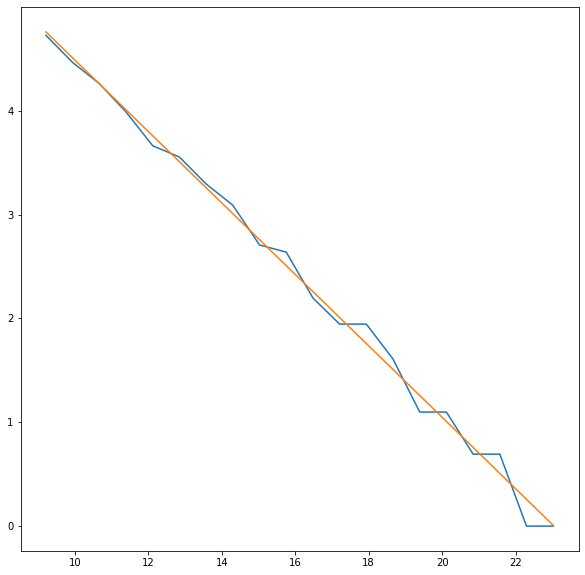

In [9]:
x = np.log(data[:,0])
y = np.log(data[:,1])
fnc = lambda x,p0,p1: p0+p1*x
popt, pcov = curve_fit(fnc, x, y)

fig, ax = plt.subplots(figsize=(10,10))
ax.plot(x, y)
ax.plot(x, fnc(x,*popt), label=f"p0 = {p0.round(3)}  p1 = {p1.round(3)}")
ax.legend(loc="upper right")